# Problem statement

An Ecommerce company based in New York City sells clothing online, but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. This project uses fake customer data.

# Importing Libraries

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest, kstest
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [58]:
data=pd.read_csv(r"C:\Users\Shreya Chandoba\OneDrive\Desktop\Refactor\Ecommerce Customers.csv")

In [3]:
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


# Data Preprocessing

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [19]:
# from info we can see that There are no missing values in data.

In [20]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [21]:
# We got summary of data

In [22]:
data.shape

(500, 8)

In [23]:
#500 rows and 8 columns are present in d

In [24]:
data.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [25]:
# all columns or features are object and float type.

In [26]:
data.isnull()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


In [27]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [28]:
#Missing values are not present

In [29]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [30]:
data.duplicated().sum()

0

In [31]:
#Duplicate values are not present

In [32]:
#target variable is Dependent the value which we have to predict
#Here target variable is Yearly amount spent

#input features are those who are used for predicting the target variable those are called as indepedent variable
# Email,address,avatar,Length of Membership,Time on Website,Time on app



In [33]:
x=data.iloc[:,3:-1]
y=data.iloc[:,-1]

# Exploratory Data Analysis

Text(0, 0.5, 'Yearly Amount Spent')

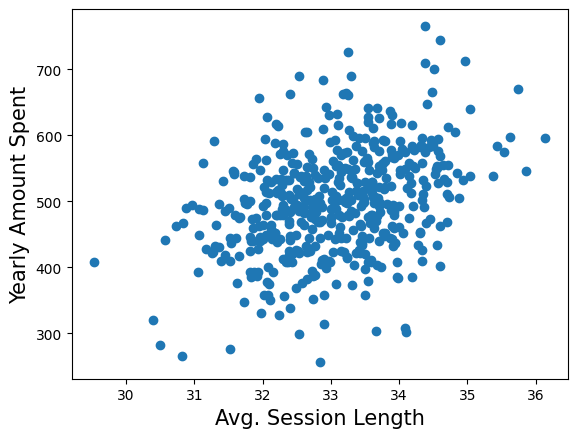

In [34]:
plt.scatter(x="Avg. Session Length",y="Yearly Amount Spent",data=data)
plt.xlabel("Avg. Session Length",fontdict={'fontsize':15,'fontweight':3,'color':'black'})
plt.ylabel("Yearly Amount Spent",fontdict={'fontsize':15,'fontweight':3,'color':'black'})

Text(0, 0.5, 'Yearly Amount Spent')

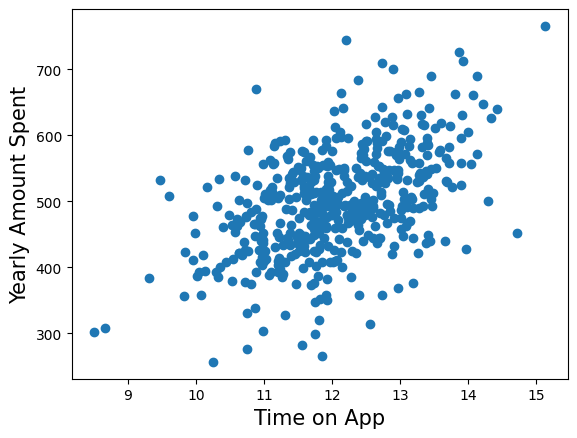

In [35]:
plt.scatter(x="Time on App",y="Yearly Amount Spent",data=data)
plt.xlabel("Time on App",fontdict={'fontsize':15,'fontweight':3,'color':'black'})
plt.ylabel("Yearly Amount Spent",fontdict={'fontsize':15,'fontweight':3,'color':'black'})

Text(0, 0.5, 'Yearly Amount Spent')

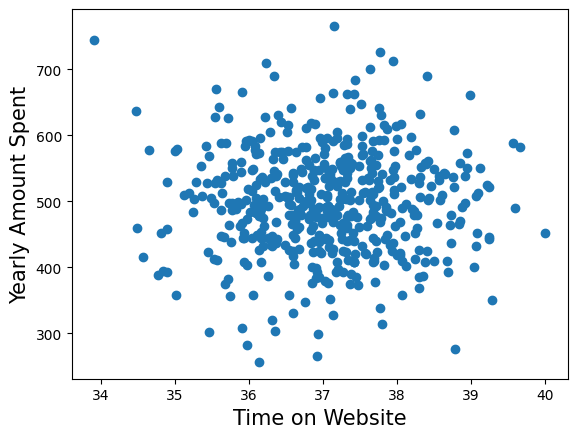

In [36]:
plt.scatter(x="Time on Website",y="Yearly Amount Spent",data=data)
plt.xlabel("Time on Website",fontdict={'fontsize':15,'fontweight':3,'color':'black'})
plt.ylabel("Yearly Amount Spent",fontdict={'fontsize':15,'fontweight':3,'color':'black'})

Text(0, 0.5, 'Yearly Amount Spent')

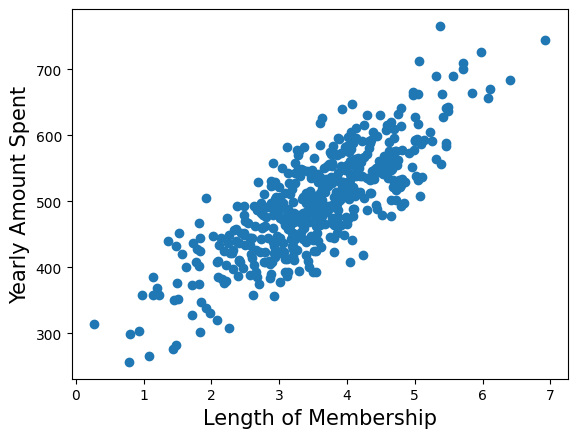

In [37]:
plt.scatter(x="Length of Membership",y="Yearly Amount Spent",data=data)
plt.xlabel("Length of Membership",fontdict={'fontsize':15,'fontweight':3,'color':'black'})
plt.ylabel("Yearly Amount Spent",fontdict={'fontsize':15,'fontweight':3,'color':'black'})

In [38]:
#There is more linear relationship between input feature Length of Membership and Yearly Amount spend.

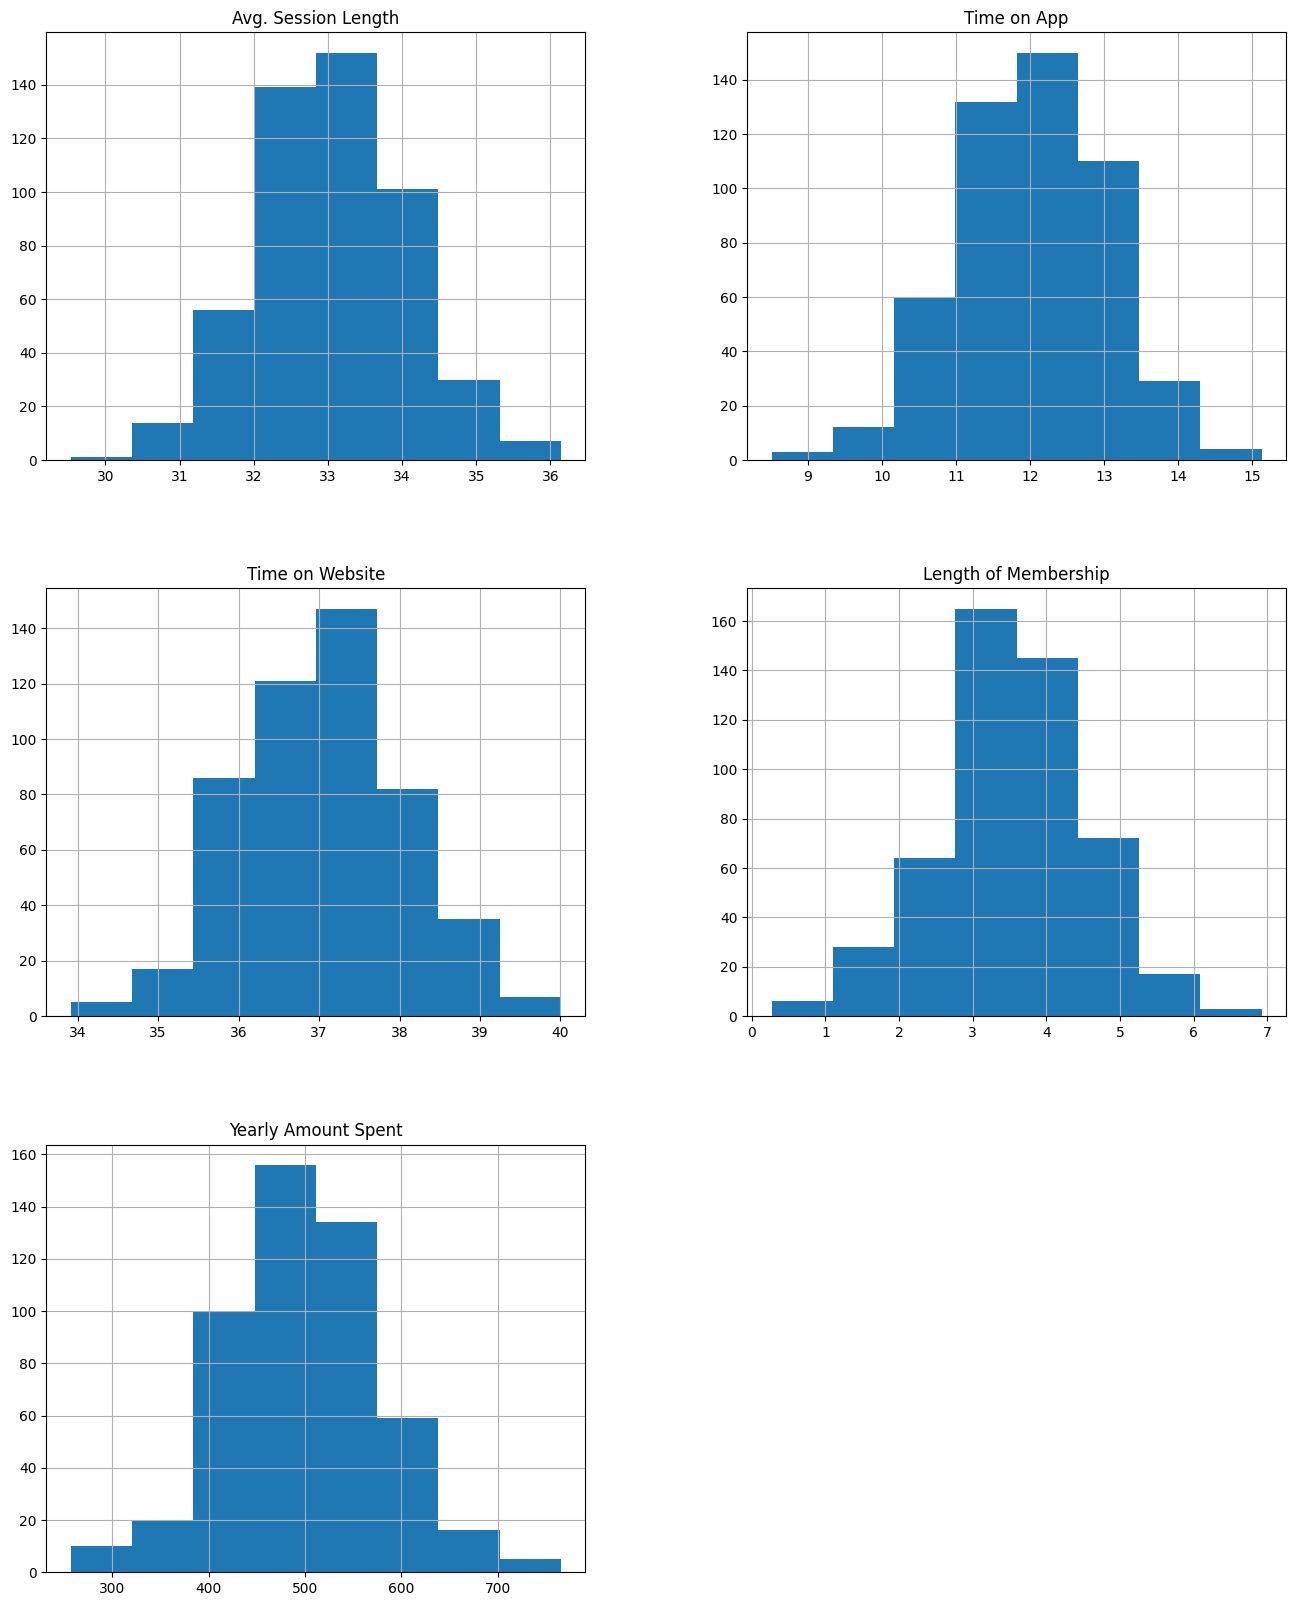

In [39]:
data.hist(bins=8,figsize=(16,20))
plt.show()

<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Count'>

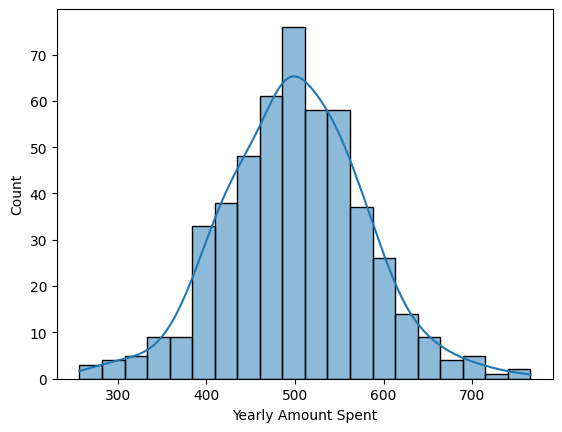

In [40]:
sns.histplot(x="Yearly Amount Spent",data=data,kde=True)

In [41]:
#Target variable has symmetrical distribution.

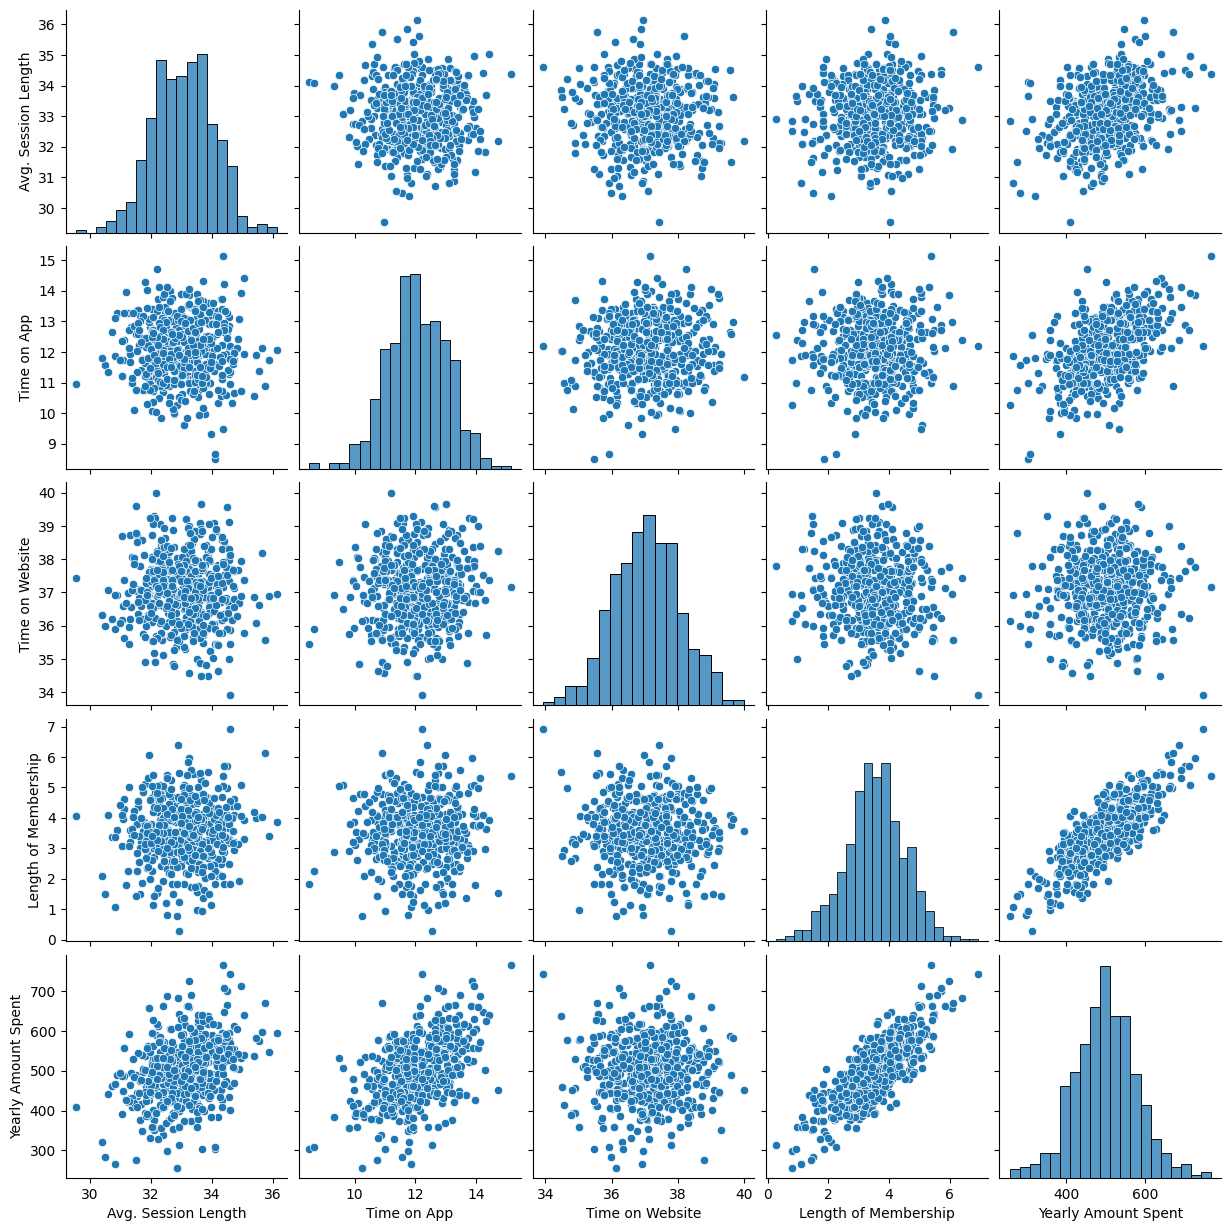

In [42]:
sns.pairplot(data)

In [43]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

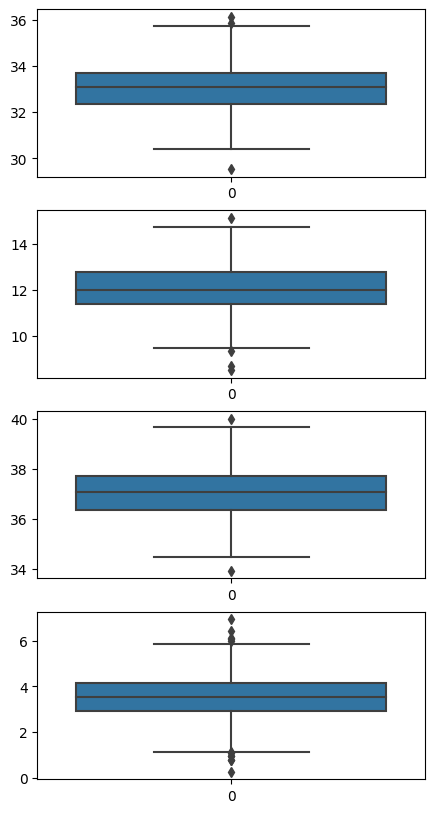

In [44]:
fig,axes=plt.subplots(4,figsize=(5,10))
plt1=sns.boxplot(data["Avg. Session Length"],ax=axes[0])
plt2=sns.boxplot(data["Time on App"],ax=axes[1])
plt3=sns.boxplot(data["Time on Website"],ax=axes[2])
plt4=sns.boxplot(data["Length of Membership"],ax=axes[3])


In [45]:
data1=data.iloc[:,3:]

In [46]:
def outlier_removal(data1,col):
    plt.figure(figsize=(20,20))
    fig,axes=plt.subplots(ncols=1,nrows=2,figsize=(12,4))
    sns.boxplot(data=data1,x=col,ax=axes[0]).set_title("Before Outlier removal"+col)
    lower_limit=data1[col].quantile(0.10)
    upper_limit=data1[col].quantile(0.90)
    a=[]
    for x in data1[col]:
        if x<lower_limit:
            x=lower_limit
            a.append(x)
        elif x>upper_limit:
            x=upper_limit
            a.append(x)
        else:
            x=x
            a.append(x)
    data1[col]=a
    sns.boxplot(data=data1,x=col,ax=axes[1],color='pink').set_title("After Outlier Removal"+col)
    plt.show()
    return data

<Figure size 2000x2000 with 0 Axes>

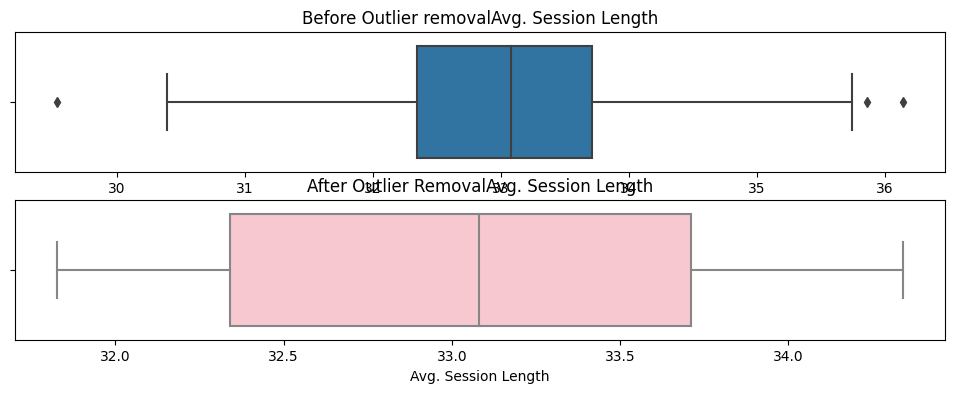

<Figure size 2000x2000 with 0 Axes>

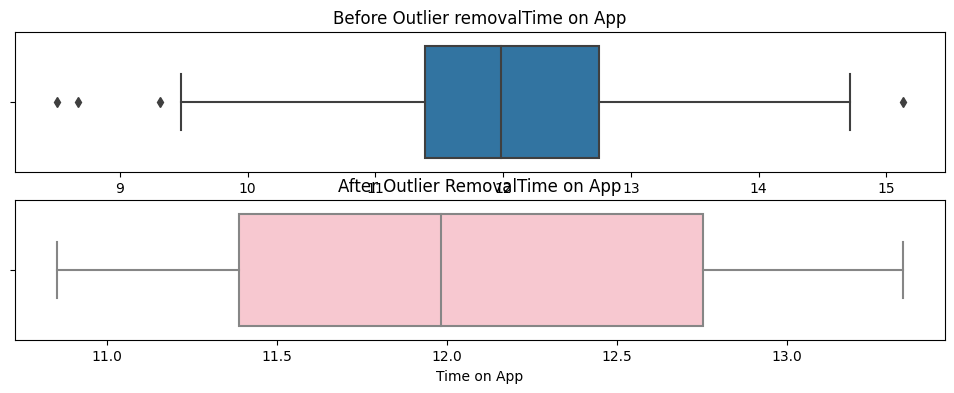

<Figure size 2000x2000 with 0 Axes>

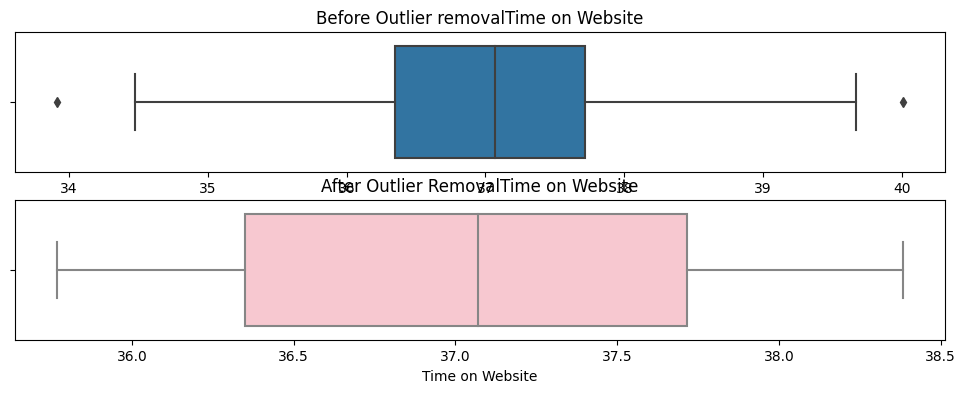

<Figure size 2000x2000 with 0 Axes>

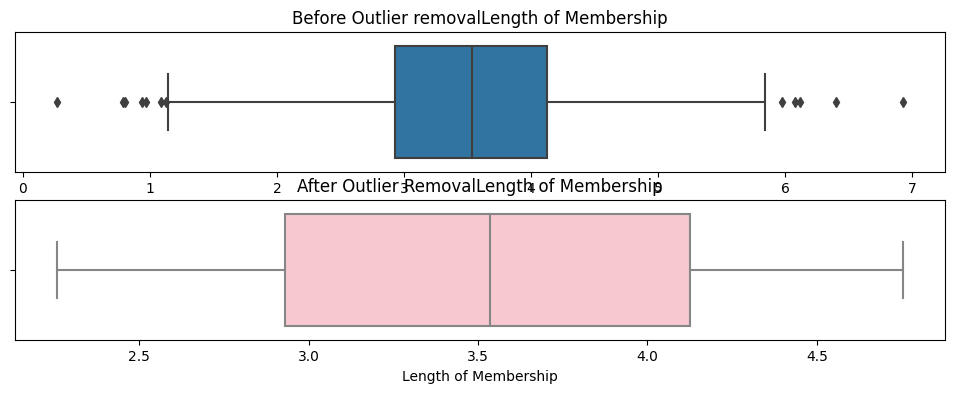

<Figure size 2000x2000 with 0 Axes>

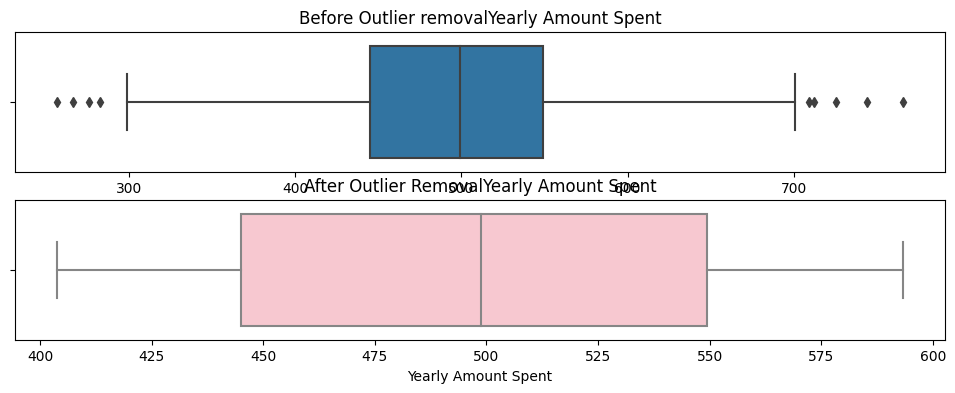

In [47]:
for col in data1.columns:
    data=outlier_removal(data1,col)
plt.show()

In [48]:
data.corr()

C:\Users\Shreya Chandoba\AppData\Local\Temp\ipykernel_2892\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


C:\Users\Shreya Chandoba\AppData\Local\Temp\ipykernel_2892\584086766.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

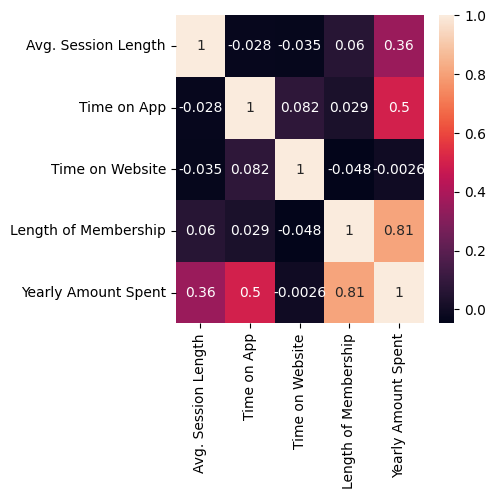

In [49]:
plt.figure(figsize=(4,4))
sns.heatmap(data.corr(),annot=True)

In [50]:
#Conclusion - All variables are uncorrelated with each other. they are indepedent.

In [51]:
#Features
#Target variable

In [52]:
x=data.iloc[:,3:-1]

In [53]:
y=data.iloc[:,-1]

# Checking Assumptions

In [54]:
# Checking Assumptions for Linear Regression model
# Linearity
# No Multicolliearity
# Normality of Residuals
# Normal distribution of errors


In [ ]:
#Linearity

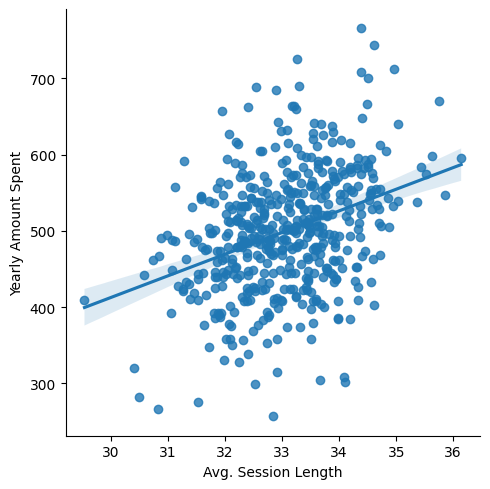

In [59]:
sns.lmplot(x="Avg. Session Length",y="Yearly Amount Spent",data=data)

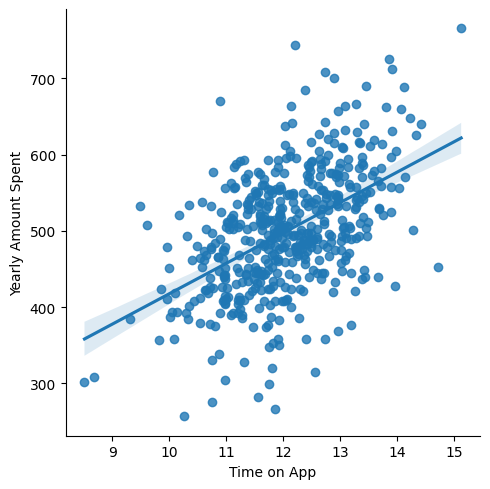

In [61]:
sns.lmplot(x="Time on App",y="Yearly Amount Spent",data=data)

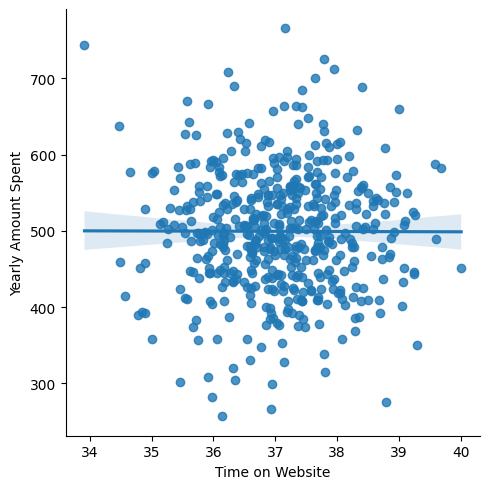

In [62]:
sns.lmplot(x="Time on Website",y="Yearly Amount Spent",data=data)

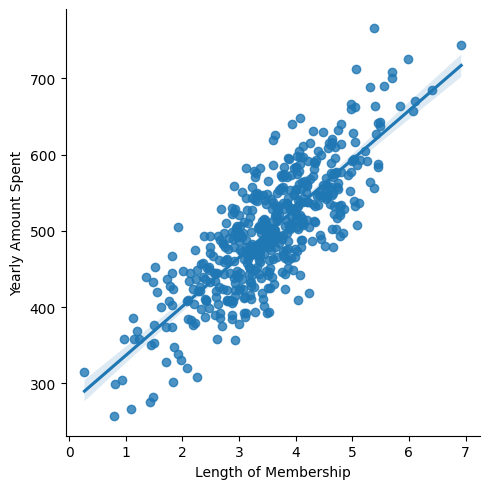

In [63]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=data)

In [ ]:
#All features much follows linearity assumption

In [79]:
data.corr()

C:\Users\Shreya Chandoba\AppData\Local\Temp\ipykernel_2892\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


C:\Users\Shreya Chandoba\AppData\Local\Temp\ipykernel_2892\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

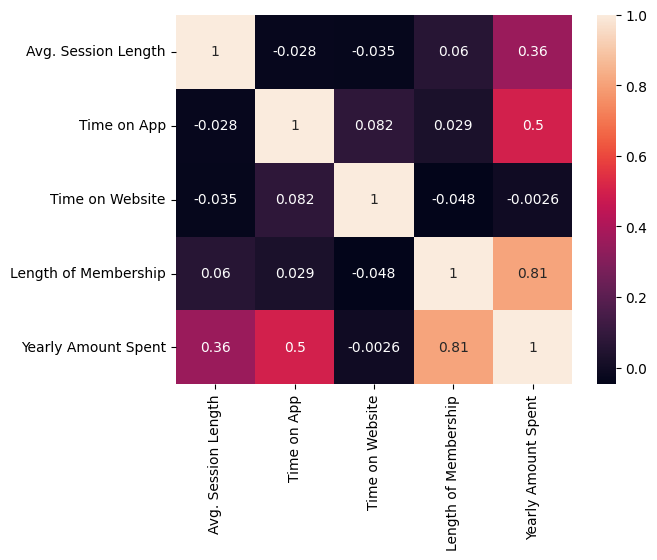

In [80]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
#No Multicollinearity

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [92]:
l1=LinearRegression()
l1.fit(x_train,y_train)

LinearRegression()

In [93]:
y_pred=l1.predict(x_test)

In [94]:
y_pred

array([531.67285384, 423.38997127, 571.96835475, 531.77836344,
       548.74869547, 577.70458359, 525.81407235, 417.96313713,
       516.5989646 , 527.87646663, 460.73043712, 480.60139218,
       542.83475971, 375.42525576, 473.97494567, 542.86941257,
       535.66157136, 616.03826379, 414.51578335, 684.85287807,
       447.51682475, 402.88729334, 457.86125301, 353.01382334,
       535.09752313, 525.79845226, 547.3876985 , 442.05821732,
       580.59333181, 508.92523232, 507.75661174, 540.20666466,
       513.17133172, 523.09397918, 525.20015063, 380.29420223,
       536.3954709 , 479.09662742, 547.64516766, 424.66124358,
       399.1324419 , 489.59756838, 610.67232735, 445.99124132,
       355.08728119, 511.35373945, 493.711557  , 557.35634887,
       585.04497422, 500.11572107, 519.43182001, 446.87012065,
       451.94060378, 466.15476626, 542.99082977, 478.21112814,
       401.14847013, 517.16097124, 562.8086947 , 485.37968405,
       478.87300172, 506.53221675, 601.4405786 , 684.40

In [95]:
residual=y_test-y_pred
residual

475     3.648756
385    -8.454911
167     7.017904
40      0.973424
350   -13.267920
         ...    
376     2.568125
317    -6.116062
466    11.014271
252    -5.640127
135     0.302083
Name: Yearly Amount Spent, Length: 100, dtype: float64

# Normality Test

In [96]:
Null Hypothesis >> Data is normally distributed, data was drwn from noraml distribution

alternate hypothesis >> Data is not normally distributed

Accept >> Null Hypothesis >> If our p value is greater than the significance level(5%),critical value

Reject >> Null hypothesis >> If our p value is lesser than the significance level(5%),critical value

p_value = 5% =0.05

if p_value > 0.05:
    print('Null Hypothesis accepted!')
    
else:
    print('Alternate Hypothesis Accepted!')

SyntaxError: invalid syntax (270533824.py, line 1)

In [97]:
test_statiscs, p_value = normaltest(residual)
print('P_value is ',p_value)

if p_value > 0.05:
    print('Null Hypothesis accepted!')
    
else:
    print('Alternate Hypothesis Accepted! & the data is not normally distributed')

P_value is  0.22624952837341733
Null Hypothesis accepted!


<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Density'>

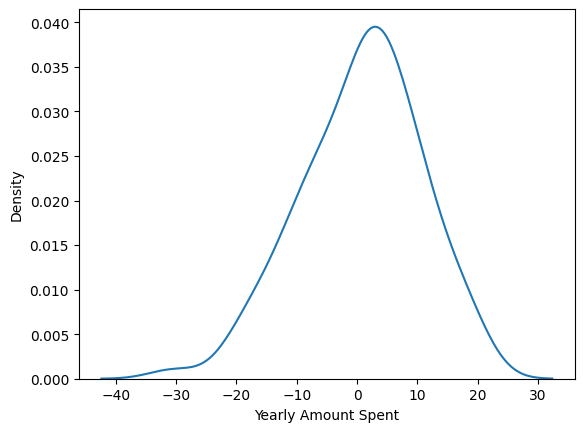

In [98]:
sns.kdeplot(residual)

In [99]:
#Data is normally distributed

In [100]:
import statsmodels.api as sm
from scipy import stats

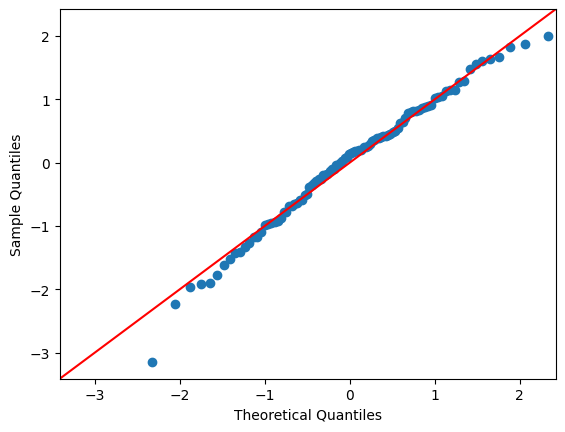

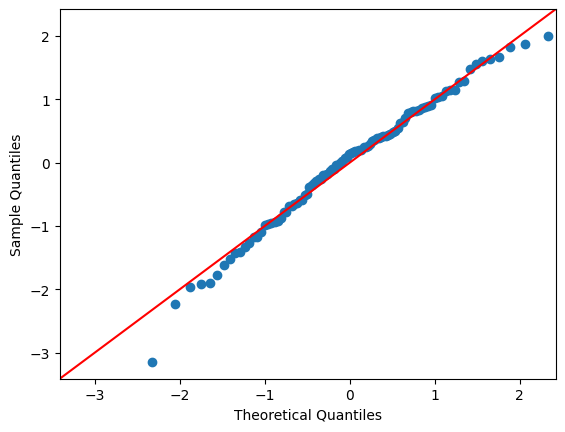

In [101]:
sm.qqplot(residual, line= '45', dist= stats.norm, fit=1)

#All asuumptions are satisfied. Regression model fit for this data

# Results and Performance Metrics

In [107]:
mse=mean_squared_error(y_test,y_pred)

In [108]:
mse

98.52307938450818

In [109]:
r2 = r2_score(y_test,y_pred)
r2

0.9794099900139316

Text(0, 0.5, 'Actual_values')

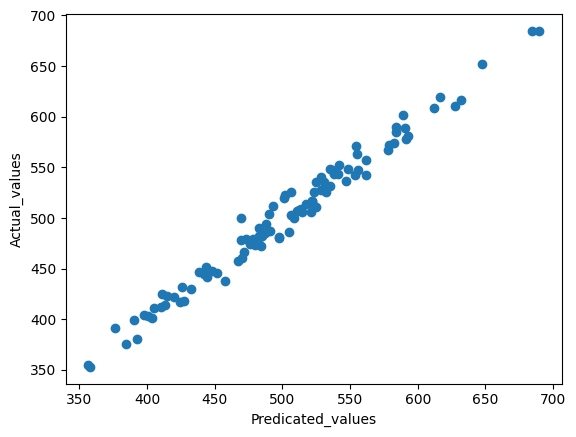

In [110]:
plt.scatter(y_test,y_pred)
plt.xlabel("Predicated_values")
plt.ylabel("Actual_values")

<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Count'>

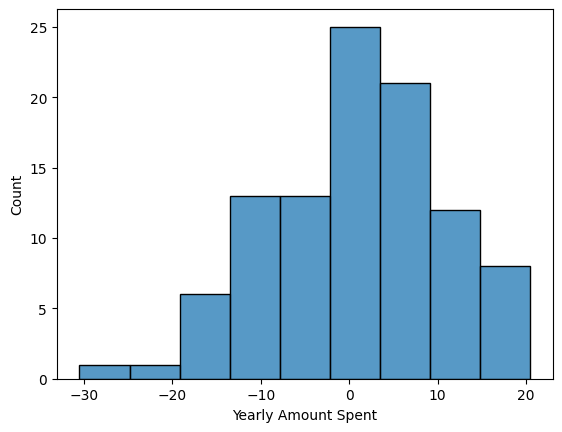

In [111]:
sns.histplot((y_test-y_pred))